In [25]:
from sklearn import datasets

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.predict(diabetes_X_test))
print(diabetes_y_test)
print("not accurate")

print(regr.coef_) 


[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]
not accurate
[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


In [27]:
import numpy as np
# The mean square error
mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)
print(mse)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

2004.5186863342092


0.585085427447195

In [28]:
print(regr.predict(diabetes_X_test))
print(diabetes_y_test)

[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


SHRINKAGE

[[0.5]
 [1. ]]
[0.5, 1]
[[0]
 [2]]


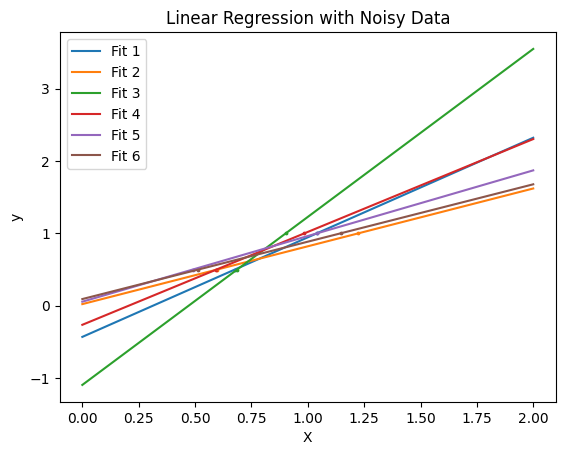

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create input data points x and y
X = np.c_[.5, 1].T  # Shape (2, 1)
print(X)
y = [.5, 1]         # Corresponding target values
print(y)
test = np.c_[0, 2].T  # Test data points
print(test)

# Initialize the linear regression model
regr = LinearRegression()

# Initialize a new figure for plotting
plt.figure()

# Set the random seed for reproducibility
np.random.seed(0)

# Loop to add noise and fit the model multiple times
for _ in range(6):
    # Add random noise to the data points
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    
    # Fit the linear regression model
    regr.fit(this_X, y)
      
    # Predict using the test data points and plot the regression line
    plt.plot(test, regr.predict(test), label=f'Fit {_+1}')
    
    # Scatter plot of the noisy data points
    plt.scatter(this_X, y, s=3)

# Display the plot with labels
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Noisy Data')
plt.legend()
plt.show()
